In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
train_face_young_adult_dir = "training-young-adult/"
train_face_adult_dir = "training-old/"

test_face_young_adult_dir = "testing-young-adult/"
test_face_adult_dir = "testing-old/"

img_height, img_width = 150, 150
batch_size = 32

In [3]:
# ImageDataGenerator for data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Training generator for young adult and adult classes
train_generator = train_datagen.flow_from_directory(
    directory='',
    classes=['training-young-adult', 'training-old'],
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Testing generator for young adult and adult classes
test_generator = test_datagen.flow_from_directory(
    directory='',
    classes=['testing-young-adult', 'testing-old'],
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Shuffle set to False for accurate test predictions
)

Found 352 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [4]:
# Model architecture: a basic CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Suryansh SR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# checkpoint = callbacks.ModelCheckpoint(
#     'best_model.h5',
#     monitor='val_accuracy',
#     save_best_only=True,
#     mode='max',
#     verbose=1
# )


In [9]:
# history = model.fit(
#     train_generator,
#     steps_per_epoch=len(train_generator),
#     epochs=10,
#     validation_data=test_generator,
#     validation_steps=len(test_generator)
# )

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 377ms/step - accuracy: 0.8452 - loss: 0.3771 - val_accuracy: 0.9182 - val_loss: 0.2046
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 372ms/step - accuracy: 0.8959 - loss: 0.2328 - val_accuracy: 0.9545 - val_loss: 0.1749
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 363ms/step - accuracy: 0.9075 - loss: 0.2065 - val_accuracy: 0.9636 - val_loss: 0.0920
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 371ms/step - accuracy: 0.9426 - loss: 0.1362 - val_accuracy: 0.9727 - val_loss: 0.0674
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step - accuracy: 0.9411 - loss: 0.1217 - val_accuracy: 0.9818 - val_loss: 0.0544
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 365ms/step - accuracy: 0.9794 - loss: 0.0820 - val_accuracy: 0.9909 - val_loss: 0.0311
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 375ms/step - accuracy: 0.9940 - loss: 0.0397 - val_accuracy: 0.9909 - val_loss: 0.0315
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 367ms/step - accuracy: 0.9831 - loss: 0.0349 - val_accuracy: 0.

In [10]:
# loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
# print("Test Accuracy: {:.2f}%".format(accuracy * 100))


# Testing accuracy and count of correctly classified images
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 1.0000 - loss: 0.0053
Test Accuracy: 100.00%


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step 


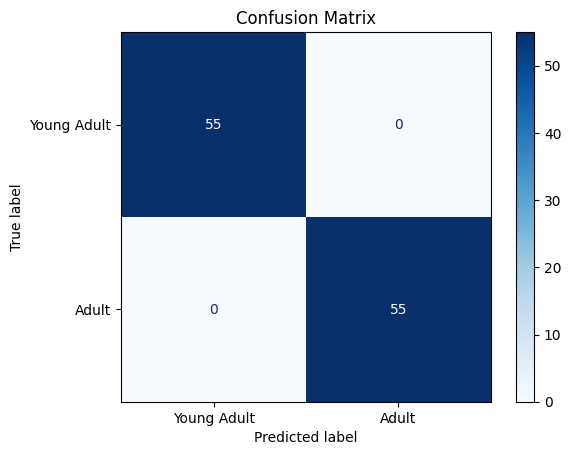

Classification Report:
              precision    recall  f1-score   support

 Young Adult       1.00      1.00      1.00        55
       Adult       1.00      1.00      1.00        55

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [15]:
# Predictions and Confusion Matrix
predictions = model.predict(test_generator, verbose=1)
predicted_labels = (predictions > 0.5).astype(int).reshape(-1)
true_labels = test_generator.classes

# Confusion matrix and report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Young Adult', 'Adult']).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Young Adult', 'Adult']))

plt.figure(figsize=(12, 5))

Text(0.5, 1.0, 'Training and Validation Accuracy')

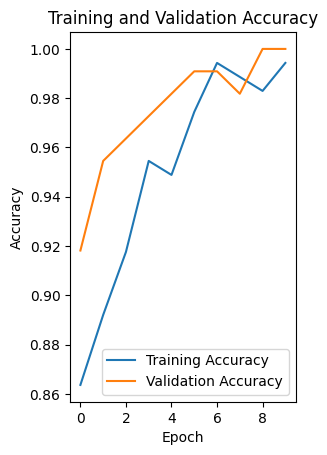

In [16]:
# Accuracy plot

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

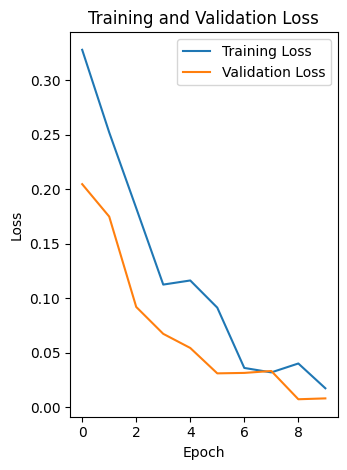

In [17]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [19]:
# Output summary of classification accuracy
correct_classifications = np.sum(predicted_labels == true_labels)
total_images = len(true_labels)

print(f"Correctly classified images: {correct_classifications} out of {total_images}")
print(f"Incorrectly classified images: {total_images - correct_classifications} out of {total_images}")
print(f"Classification accuracy: {correct_classifications / total_images * 100:.2f}%")

Correctly classified images: 110 out of 110
Incorrectly classified images: 0 out of 110
Classification accuracy: 100.00%
